In [1]:
#Import libraries
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)

import plotly.express as px 
import matplotlib.pyplot as plt 


data_df = pd.read_csv("../data/churn.csv")

In [2]:

def dataoveriew(df, message):
    print(f'{message}:\n')
    print('Number of rows: ', df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nData Features:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())
    
dataoveriew(data_df, 'Overview of the dataset')

Overview of the dataset:

Number of rows:  7043

Number of features: 21

Data Features:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values: 0

Unique values:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


### Explore Categorical features

In [4]:

def bar(feature, df=data_df ):
    #Groupby the categorical feature
    temp_df = df.groupby([feature, 'Churn']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})
    #Calculate the value counts of each distribution and it's corresponding Percentages
    value_counts_df = df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    #Calculate the value counts of each distribution and it's corresponding Percentages
    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    div_list = [element / sum(num_list) for element in num_list]
    percentage = [round(element * 100,1) for element in div_list]
    #Defining string formatting for graph annotation
    #Numeric section
    def num_format(list_instance):
        formatted_str = ''
        for index,num in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{num}%, ' #append to empty string(formatted_str)
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{num}% & '
            else:
                formatted_str=formatted_str+f'{num}%'
        return formatted_str
    #Categorical section
    def str_format(list_instance):
        formatted_str = ''
        for index, cat in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{cat}, '
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{cat} & '
            else:
                formatted_str=formatted_str+f'{cat}'
        return formatted_str


    #Running the formatting functions
    num_str = num_format(percentage)
    cat_str = str_format(categories)
    
    #Setting graph framework
    fig = px.bar(temp_df, x=feature, y='Count', color='Churn', title=f'Churn rate by {feature}', barmode="group", color_discrete_sequence=["green", "red"])
    fig.add_annotation(
                text=f'Value count of distribution of {cat_str} are<br>{num_str} percentage respectively.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.4,
                y=1.3,
                bordercolor='black',
                borderwidth=1)
    fig.update_layout(
        # margin space for the annotations on the right
        margin=dict(r=400),
    )
     
    return fig.show()

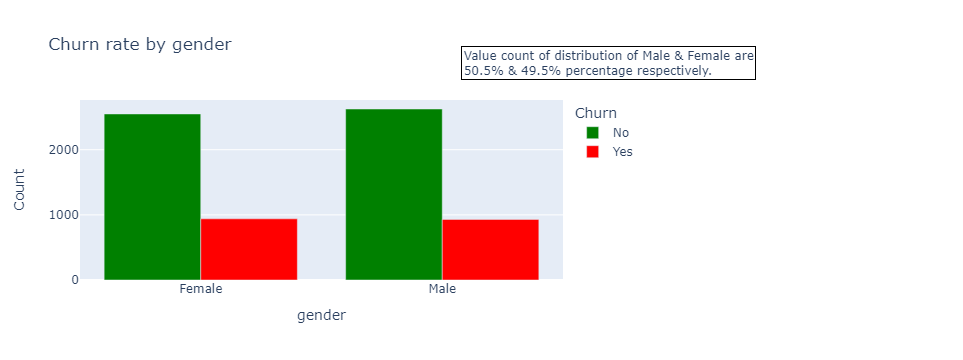

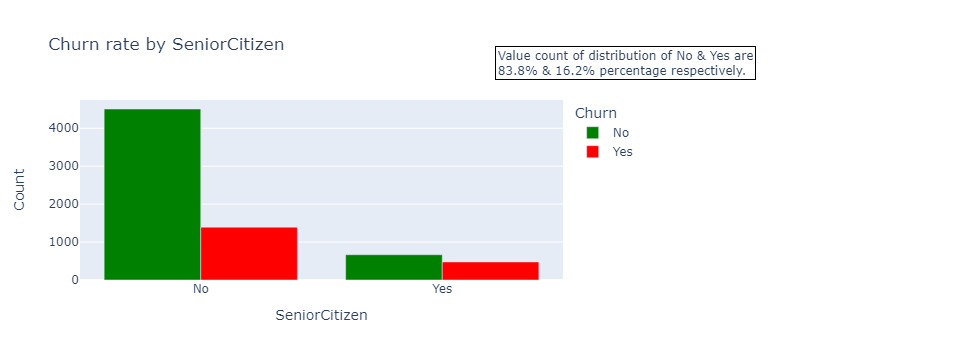

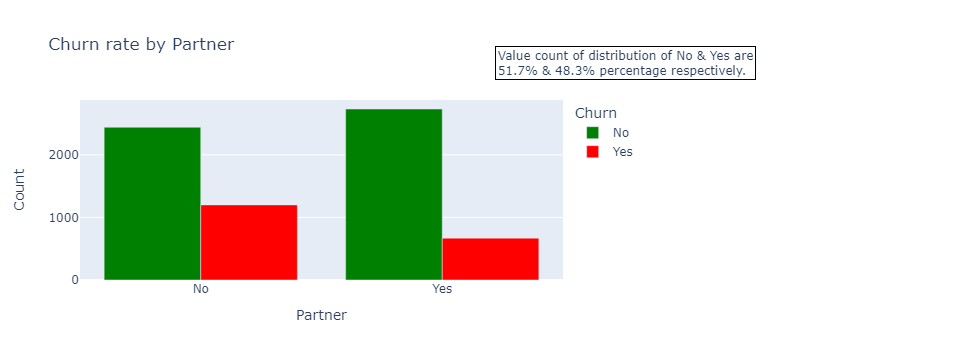

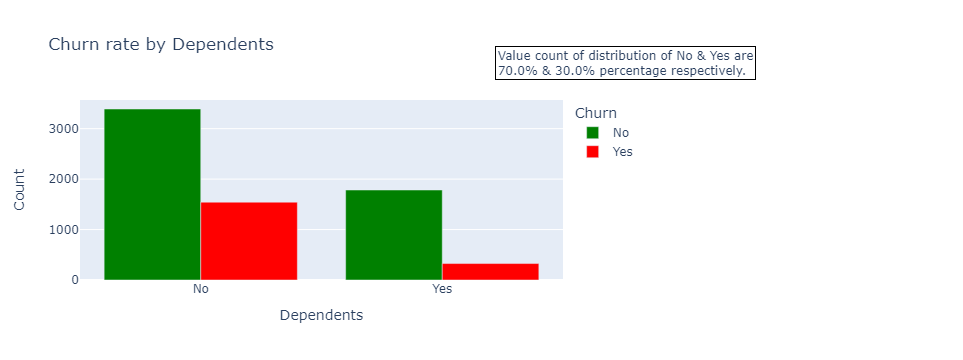

In [5]:
#Gender feature plot
bar('gender')
#SeniorCitizen feature plot 
data_df.loc[data_df.SeniorCitizen==0,'SeniorCitizen'] = "No"   #convert 0 to No in all data instances
data_df.loc[data_df.SeniorCitizen==1,'SeniorCitizen'] = "Yes"  #convert 1 to Yes in all data instances
bar('SeniorCitizen')
#Partner feature plot
bar('Partner')
#Dependents feature plot
bar('Dependents')

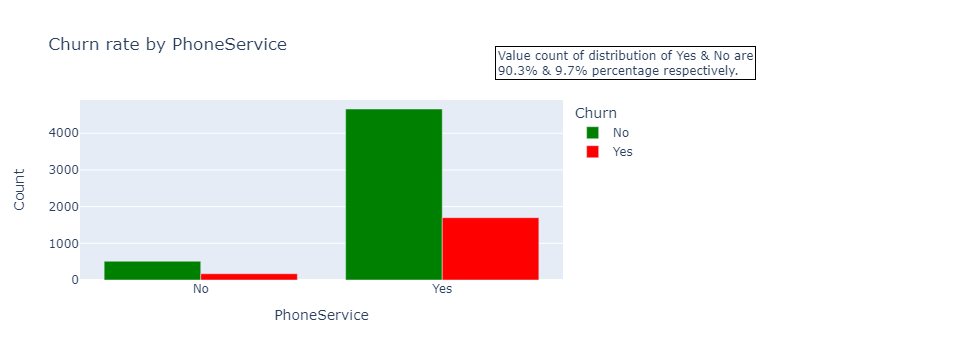

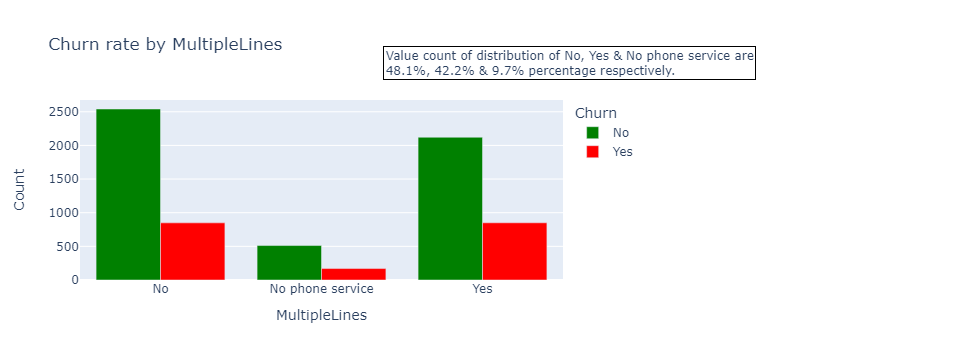

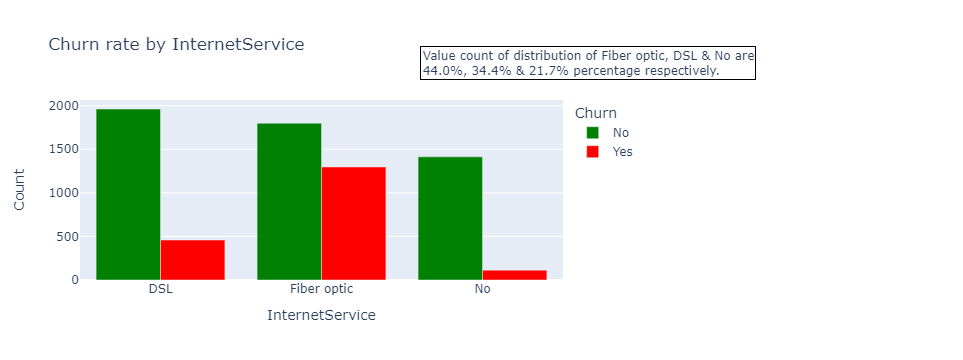

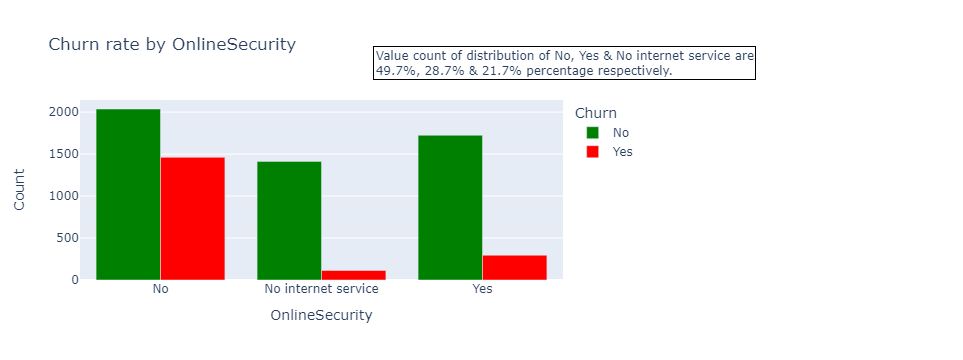

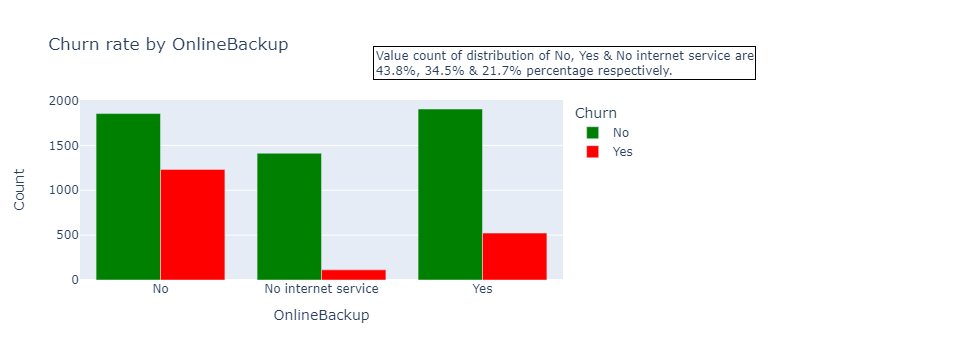

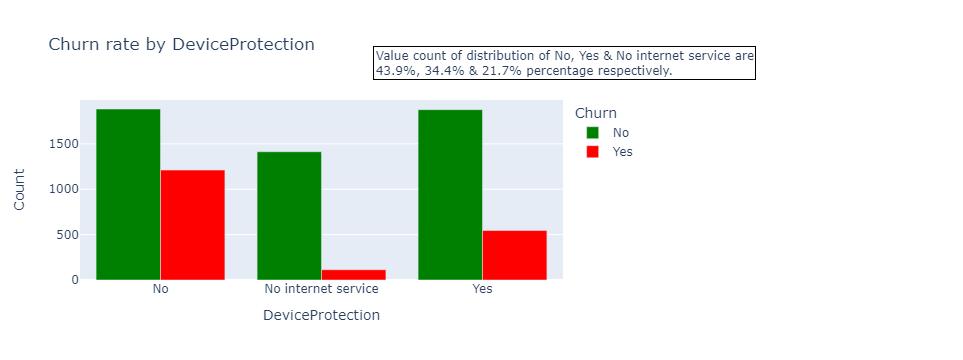

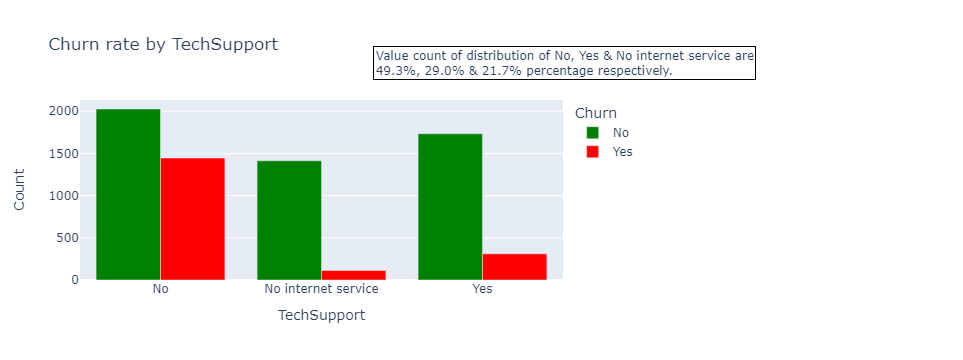

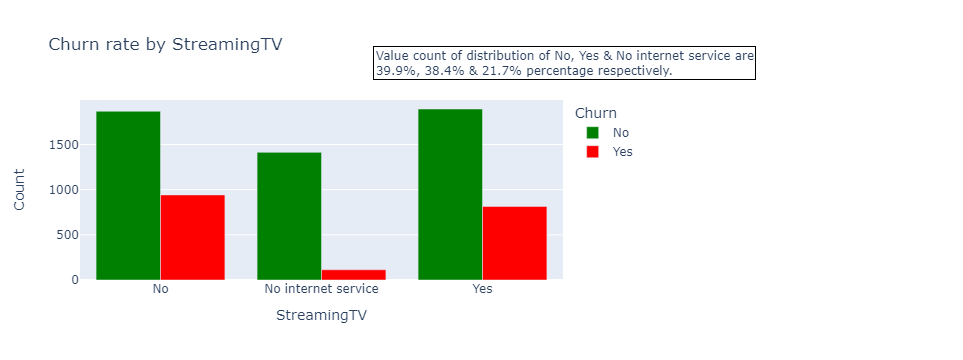

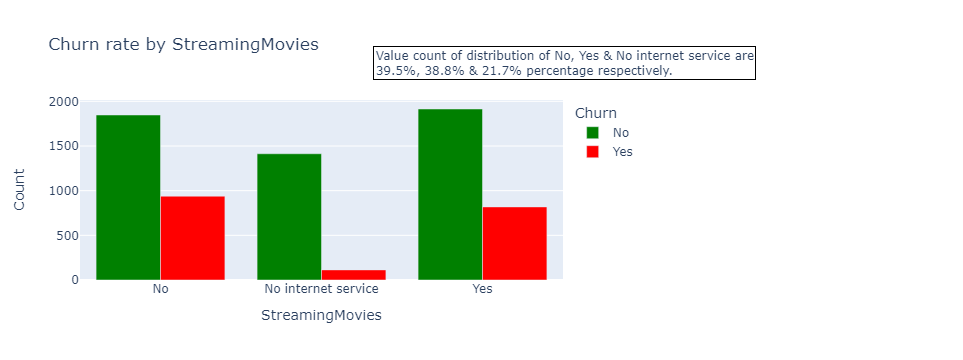

In [6]:
bar('PhoneService')
bar('MultipleLines')
bar('InternetService')
bar('OnlineSecurity')
bar('OnlineBackup')
bar('DeviceProtection')
bar('TechSupport')
bar('StreamingTV')
bar('StreamingMovies')

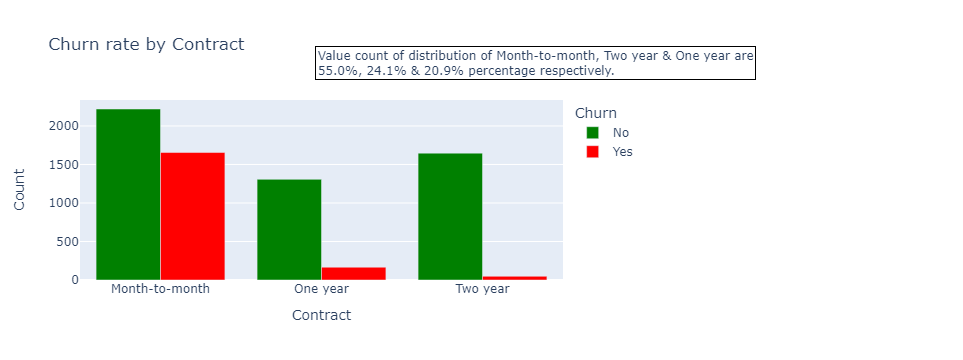

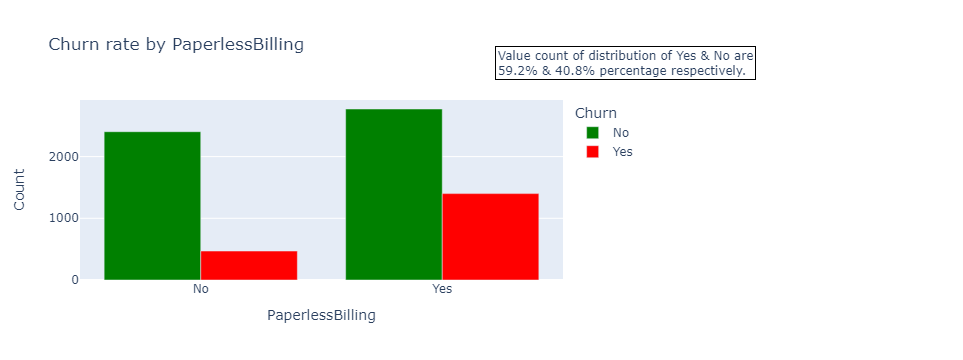

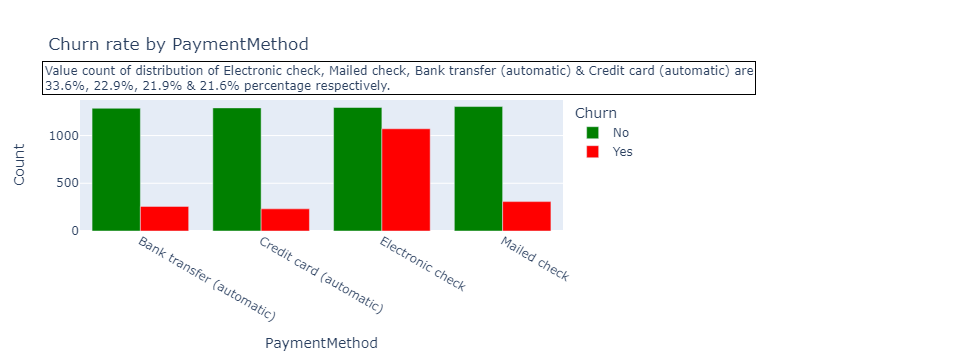

In [7]:
bar('Contract')
bar('PaperlessBilling')
bar('PaymentMethod')

### Explore Numeric features

In [8]:
data_df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
try:
    data_df['TotalCharges'] = data_df['TotalCharges'].astype(float)
except ValueError as ve:
    print (ve)

could not convert string to float: ''


In [10]:
data_df['TotalCharges'] = pd.to_numeric(data_df['TotalCharges'],errors='coerce')
#Fill the missing values with with the median value
data_df['TotalCharges'] = data_df['TotalCharges'].fillna(data_df['TotalCharges'].median())

In [11]:
# Defining the histogram plotting function
def hist(feature):
    group_df = data_df.groupby([feature, 'Churn']).size().reset_index()
    group_df = group_df.rename(columns={0: 'Count'})
    fig = px.histogram(group_df, x=feature, y='Count', color='Churn', marginal='box', title=f'Churn rate frequency to {feature} distribution', color_discrete_sequence=["green", "red"])
    fig.show()

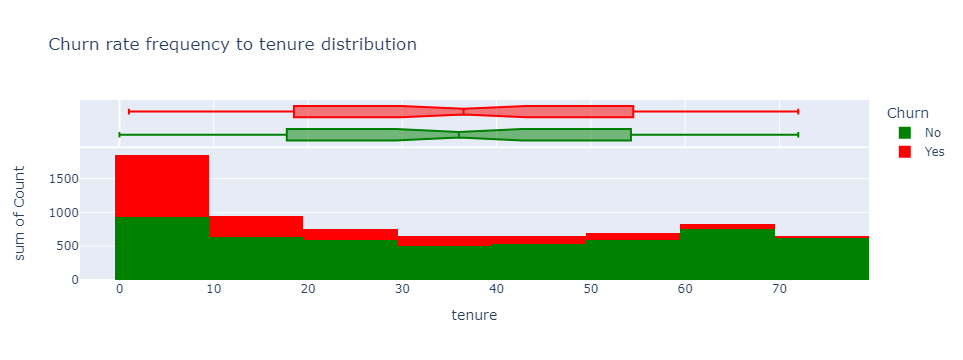

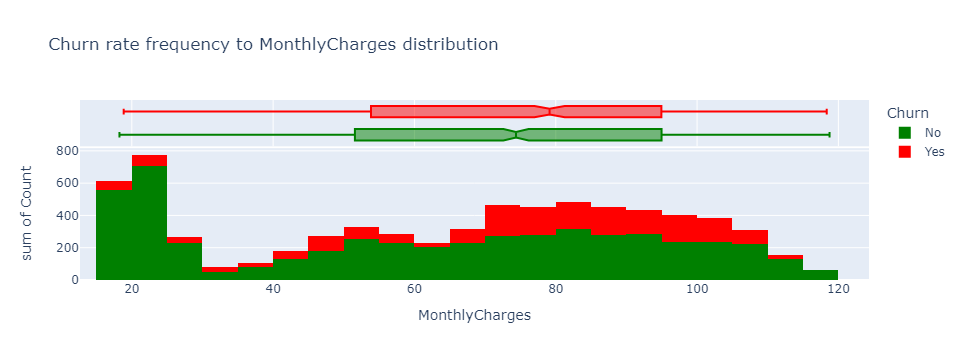

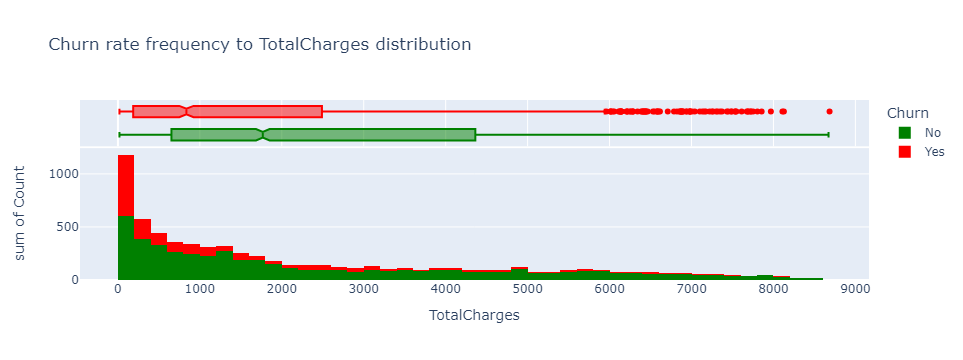

In [12]:
hist('tenure')
hist('MonthlyCharges')
hist('TotalCharges')

***
**Customer account information**: The tenure histogram is rightly skewed and shows that majority of customers has been with the telecom company for just the first few months (0-9 months) and the highest rate of churn is also in that first few months (0-9months). 75% of customers who end up leaving Telcom company  do so within their first 30 months. The monthly charge histogram shows that clients with higher monthly charges have a higher churn rate (This suggests that discounts and promotions can be an enticing reason for customers to stay). The total charge trend is quite depict due to variation in frequency.
Lets bin the numeric features into 3 sections based on quantiles (low, medium and high to get more information from it).
***

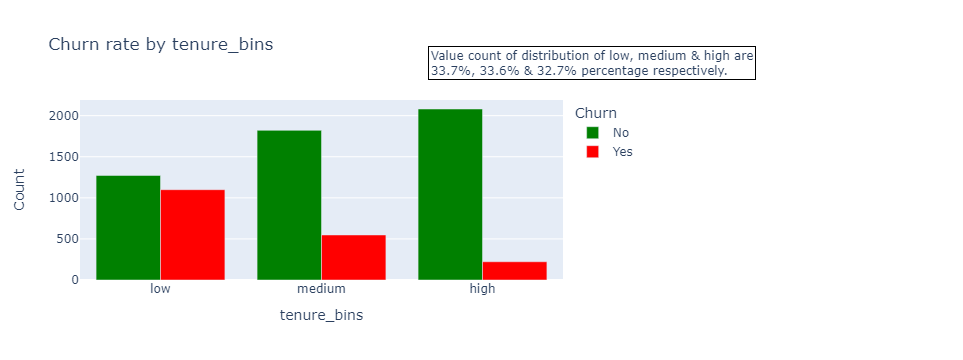

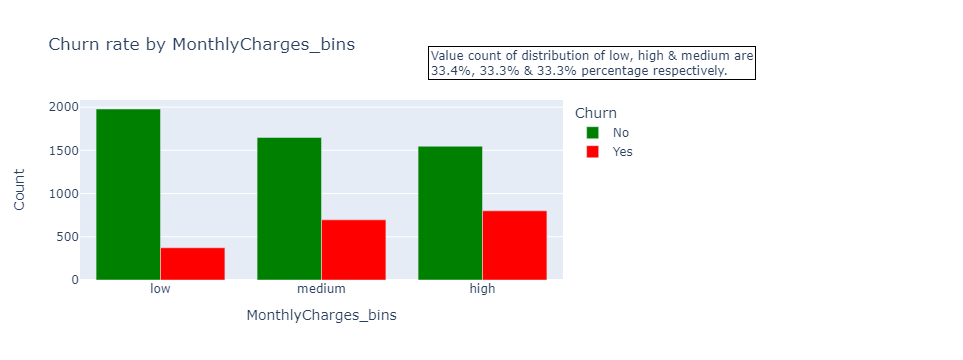

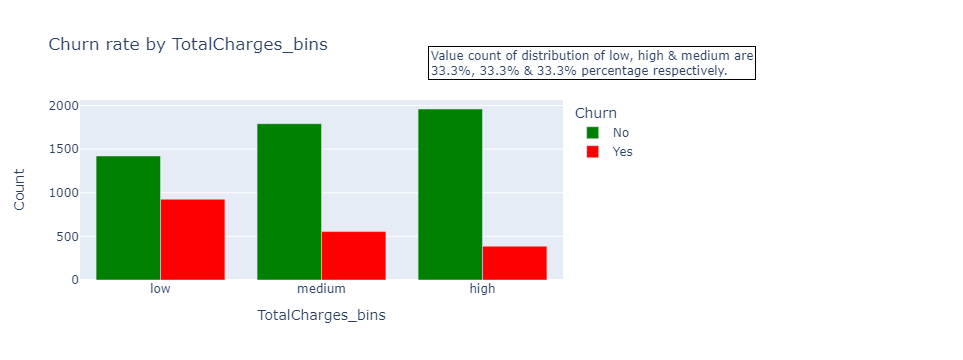

In [13]:
#Create an empty dataframe
bin_df = pd.DataFrame()

#Update the binning dataframe
bin_df['tenure_bins'] =  pd.qcut(data_df['tenure'], q=3, labels= ['low', 'medium', 'high'])
bin_df['MonthlyCharges_bins'] =  pd.qcut(data_df['MonthlyCharges'], q=3, labels= ['low', 'medium', 'high'])
bin_df['TotalCharges_bins'] =  pd.qcut(data_df['TotalCharges'], q=3, labels= ['low', 'medium', 'high'])
bin_df['Churn'] = data_df['Churn']

#Plot the bar chart of the binned variables
bar('tenure_bins', bin_df)
bar('MonthlyCharges_bins', bin_df)
bar('TotalCharges_bins', bin_df)

***
Based on binning, the low tenure and high monthly charge bins have higher churn rates as supported with the previous analysis. While the low Total charge bin has a higher churn rate. 
***

### Data preprocessing

In [14]:
# The customerID column isnt useful as the feature us used for identification of customers. 
data_df.drop(["customerID"],axis=1,inplace = True)

# Encode categorical features

#Defining the map function
def binary_map(feature):
    return feature.map({'Yes':1, 'No':0})

## Encoding target feature
data_df['Churn'] = data_df[['Churn']].apply(binary_map)

# Encoding gender category
data_df['gender'] = data_df['gender'].map({'Male':1, 'Female':0})

#Encoding other binary category
binary_list = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
data_df[binary_list] = data_df[binary_list].apply(binary_map)

#Encoding the other categoric features with more than two categories
data_df = pd.get_dummies(data_df, drop_first=True)

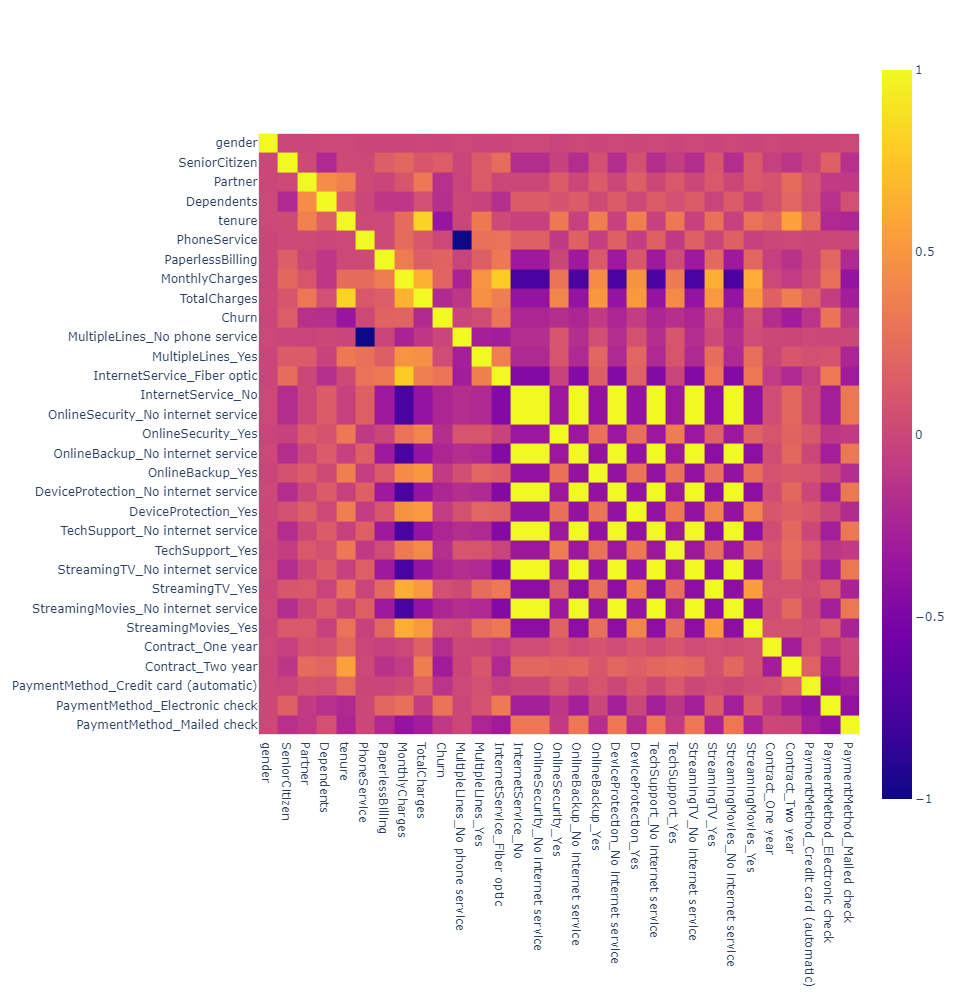

In [15]:
# Checking the correlation between features
corr = data_df.corr()

fig = px.imshow(corr,width=1000, height=1000)
fig.show()

Correlation is a statistical term is a measure on linear relationship with two variables. Features with high correlation are more linearly dependent and have almost the same effect on the dependent variable. So when two features have a high correlation, we can drop one of the two features.

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Change variable name seperators to '_'
all_columns = [column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_") for column in data_df.columns]

#Effect the change to the dataframe column names
data_df.columns = all_columns

#Prepare it for the GLM formula
glm_columns = [e for e in all_columns if e not in ['customerID', 'Churn']]
glm_columns = ' + '.join(map(str, glm_columns))

#Fiting it to the Generalized Linear Model
glm_model = smf.glm(formula=f'Churn ~ {glm_columns}', data=data_df, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                            GLM   Df Residuals:                     7019
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2914.7
Date:                Wed, 28 Jul 2021   Deviance:                       5829.3
Time:                        21:21:25   Pearson chi2:                 8.04e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [17]:
np.exp(res.params)

Intercept                                2.287343
gender                                   0.978355
SeniorCitizen                            1.239957
Partner                                  0.997312
Dependents                               0.857471
tenure                                   0.942322
PhoneService                             1.654668
PaperlessBilling                         1.407543
MonthlyCharges                           0.960432
TotalCharges                             1.000318
MultipleLines_No_phone_service           1.382358
MultipleLines_Yes                        1.563475
InternetService_Fiber_optic              5.771657
InternetService_No                       0.774257
OnlineSecurity_No_internet_service       0.774257
OnlineSecurity_Yes                       0.814269
OnlineBackup_No_internet_service         0.774257
OnlineBackup_Yes                         1.026127
DeviceProtection_No_internet_service     0.774257
DeviceProtection_Yes                     1.159152


In [18]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data_df['tenure'] = sc.fit_transform(data_df[['tenure']])
data_df['MonthlyCharges'] = sc.fit_transform(data_df[['MonthlyCharges']])
data_df['TotalCharges'] = sc.fit_transform(data_df[['TotalCharges']])

#### Creating a baseline model

In [19]:
# Import Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Split data into train and test sets
from sklearn.model_selection import train_test_split
X = data_df.drop('Churn', axis=1)
y = data_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)  

In [20]:
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

    print_scores(alg, y_test, y_pred)
    return model

In [21]:
# Running logistic regression model
log_model = modeling(LogisticRegression, 'Logistic Regression')

Logistic Regrssion
accuracy:  0.7983909133932797
precision:  0.6281800391389433
recall:  0.5763016157989228
f1_score:  0.7955174819104321


LogisticRegression()

In [22]:
# Feature selection to improve model building
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
log = LogisticRegression()
rfecv = RFECV(estimator=log, cv=StratifiedKFold(10, random_state=50, shuffle=True), scoring="accuracy")
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
      estimator=LogisticRegression(), scoring='accuracy')

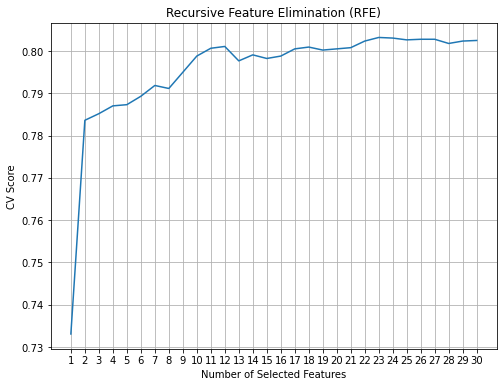

The optimal number of features: 23


In [23]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, X.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

In [24]:
#Saving dataframe with optimal features
X_rfe = X.iloc[:, rfecv.support_]

#Overview of the optimal features in comparison with the intial dataframe
print("\"X\" dimension: {}".format(X.shape))
print("\"X\" column list:", X.columns.tolist())
print("\"X_rfe\" dimension: {}".format(X_rfe.shape))
print("\"X_rfe\" column list:", X_rfe.columns.tolist())

"X" dimension: (7043, 30)
"X" column list: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No_phone_service', 'MultipleLines_Yes', 'InternetService_Fiber_optic', 'InternetService_No', 'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes', 'OnlineBackup_No_internet_service', 'OnlineBackup_Yes', 'DeviceProtection_No_internet_service', 'DeviceProtection_Yes', 'TechSupport_No_internet_service', 'TechSupport_Yes', 'StreamingTV_No_internet_service', 'StreamingTV_Yes', 'StreamingMovies_No_internet_service', 'StreamingMovies_Yes', 'Contract_One_year', 'Contract_Two_year', 'PaymentMethod_Credit_card__automatic_', 'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check']
"X_rfe" dimension: (7043, 23)
"X_rfe" column list: ['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No_phone_service', 'MultipleLines_Yes', '

In [25]:
# Splitting data with optimal features
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3, random_state=50)  

In [26]:
# Running logistic regression model
log_model = modeling(LogisticRegression, 'Logistic Regression Classification')

Logistic Regrssion Classification
accuracy:  0.8017037387600567
precision:  0.6374501992031872
recall:  0.5745062836624776
f1_score:  0.7982762676502377


In [27]:
### Trying other machine learning algorithms: SVC
svc_model = modeling(SVC, 'SVC Classification')

SVC Classification
accuracy:  0.7993374349266446
precision:  0.6494382022471911
recall:  0.518850987432675
f1_score:  0.7916082146150322


In [28]:
#Random forest
rf_model = modeling(RandomForestClassifier, "Random Forest Classification")

Random Forest Classification
accuracy:  0.7799337434926644
precision:  0.5946502057613169
recall:  0.518850987432675
f1_score:  0.7748978720450675


In [29]:
#Decision tree
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")

Decision Tree Classification
accuracy:  0.7264552768575485
precision:  0.4825291181364393
recall:  0.5206463195691203
f1_score:  0.7296906209370673


In [30]:
#Naive bayes 
nb_model = modeling(GaussianNB, "Naive Bayes Classification")

Naive Bayes Classification
accuracy:  0.6540463795551349
precision:  0.4257679180887372
recall:  0.895870736086176
f1_score:  0.6729702812977834


In [35]:
## Improve best model by hyperparameter tuning
# define model
model = LogisticRegression()

# define evaluation
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
from scipy.stats import loguniform
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 1000)

# define search
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(X_rfe, y)
summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [32]:
params = result.best_params_
params

{'C': 105.95953102146511, 'penalty': 'l2', 'solver': 'liblinear'}

In [33]:
#Improving the Logistic Regression model
log_model = modeling(LogisticRegression, 'Logistic Regression Classification', params=params)

Logistic Regrssion Classification
accuracy:  0.8031235210601041
precision:  0.6407185628742516
recall:  0.5763016157989228
f1_score:  0.7996532493520713


In [1]:
#Saving best model 
import joblib
#Sava the model to disk
filename = 'model.sav'
joblib.dump(log_model, filename)

NameError: name 'log_model' is not defined